In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import confusion_matrix, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 7)

1. Data Preprocessing

In [2]:
# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Create DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['species'] = y
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display first few rows
print("Dataset Overview:")
print(df.head())
print("\nDataset Shape:", df.shape)

Dataset Overview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  

Dataset Shape: (150, 6)


In [3]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species_name         0
dtype: int64


In [4]:
# Scale the features (excluding the species columns)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Features scaled successfully!")

Features scaled successfully!


2. Exploratory Data Analysis (EDA)

In [5]:
# Basic statistics
print("Basic Statistics:")
print(df.describe())

Basic Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


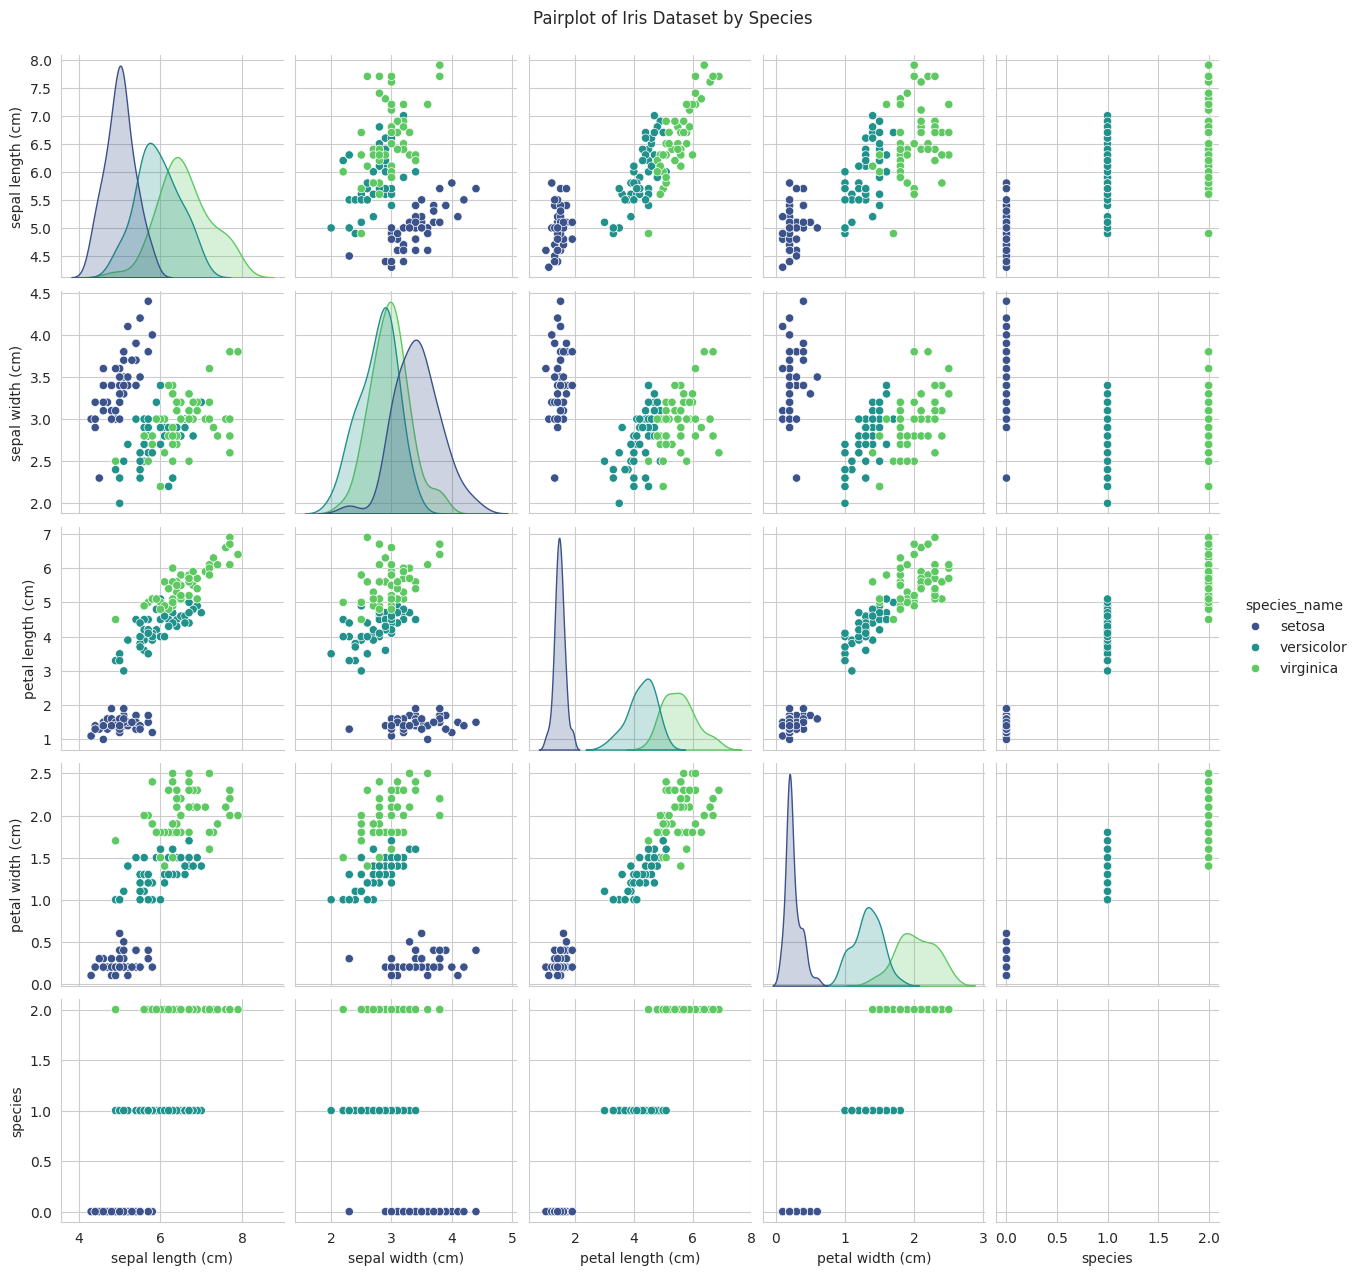

In [6]:
# Pairplot to visualize relationships between features
sns.pairplot(df, hue='species_name', palette='viridis')
plt.suptitle("Pairplot of Iris Dataset by Species", y=1.02)
plt.show()

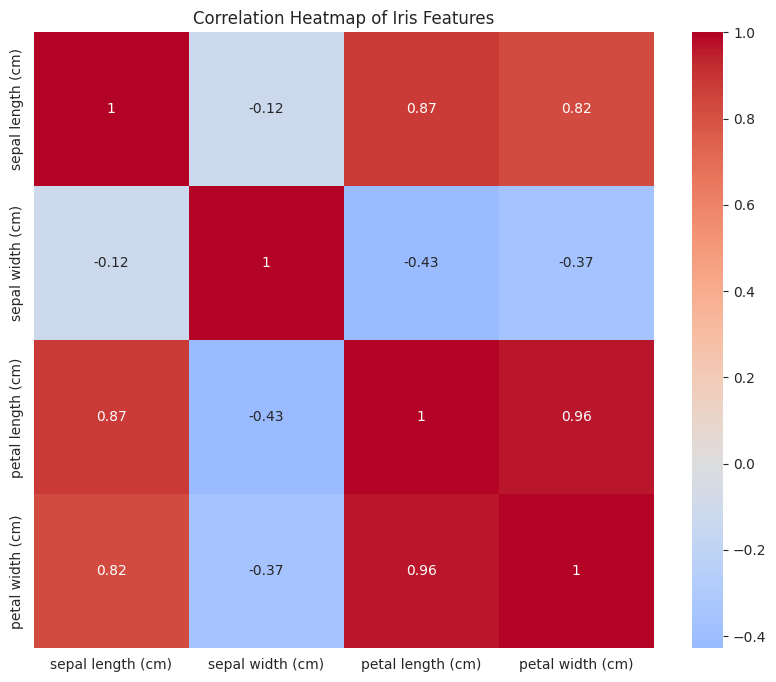

In [7]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation = df.iloc[:, :4].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Iris Features")
plt.show()

3. Clustering Algorithms

K-Means Clustering

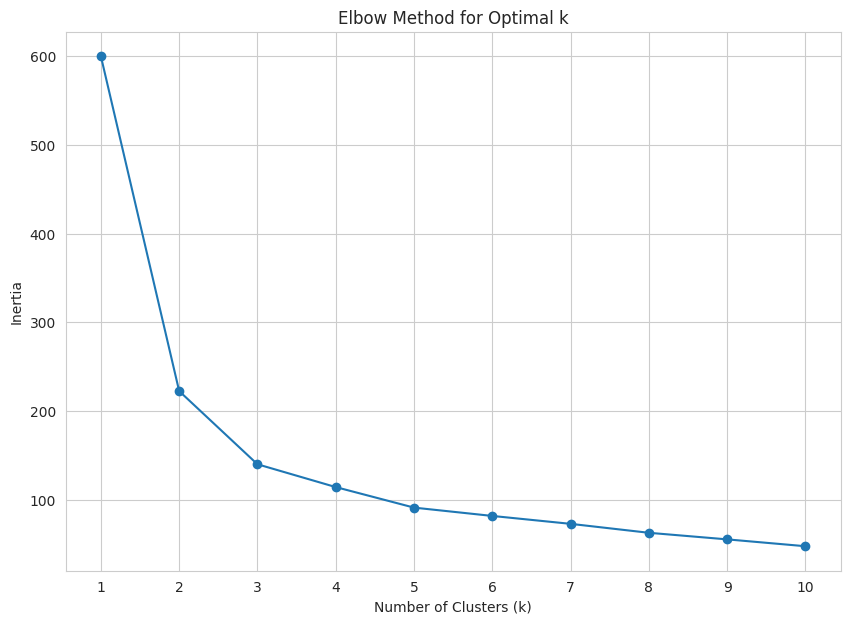

In [8]:
# Elbow method to find optimal k
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.show()

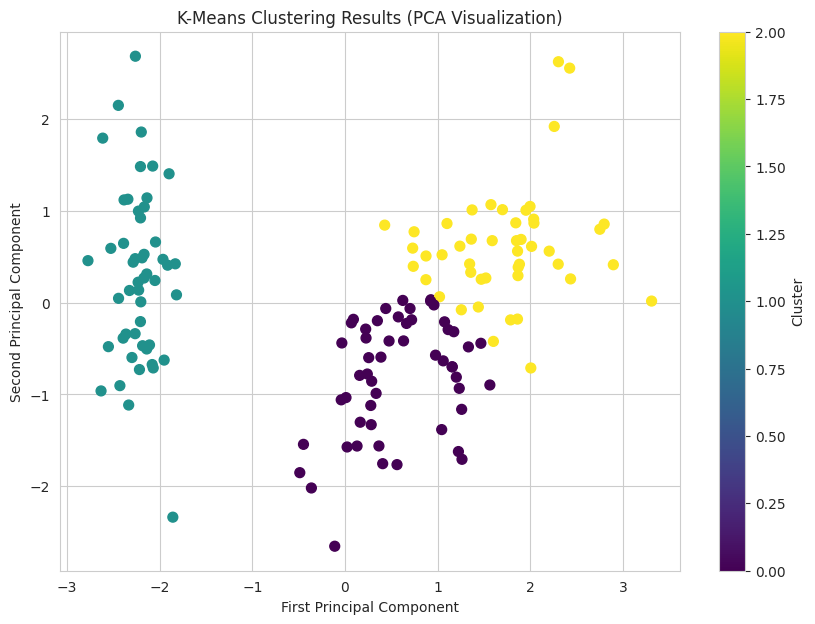

In [9]:
# Apply K-Means with optimal k (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-Means Clustering Results (PCA Visualization)')
plt.colorbar(label='Cluster')
plt.show()

Hierarchical Clustering

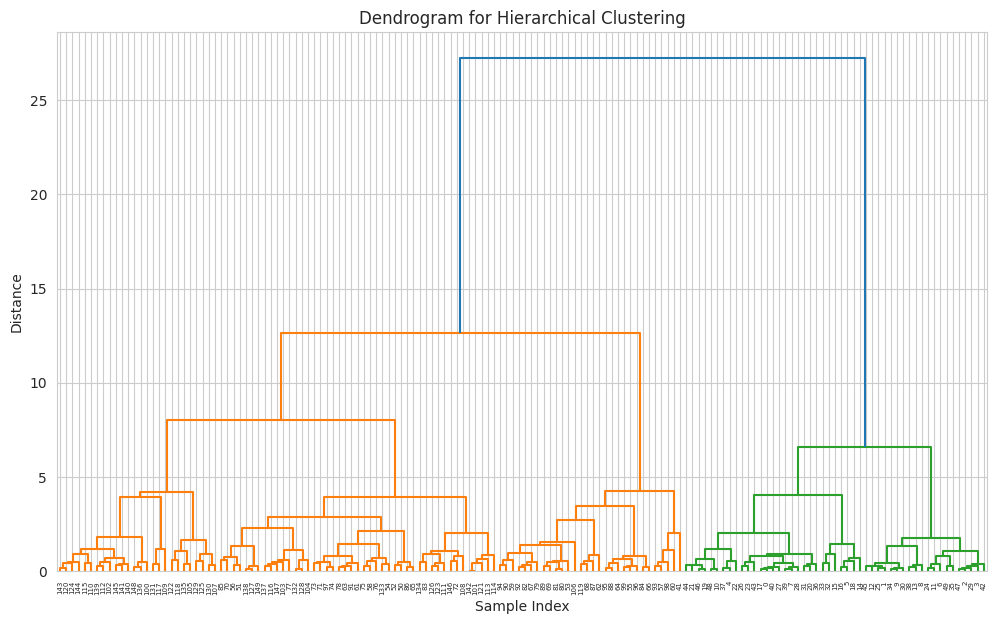

In [10]:
# Plot dendrogram
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

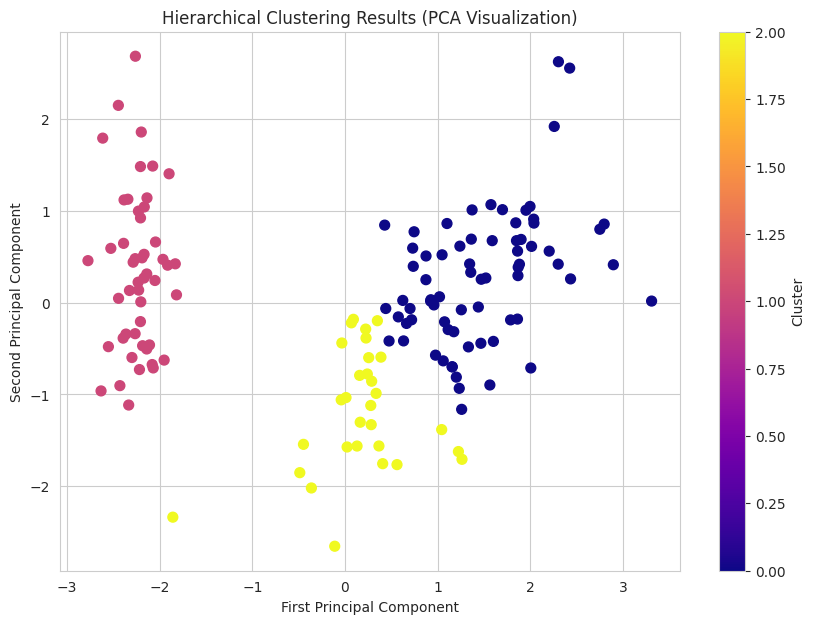

In [11]:
# Apply Hierarchical Clustering with 3 clusters
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Visualize clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='plasma', s=50)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Hierarchical Clustering Results (PCA Visualization)')
plt.colorbar(label='Cluster')
plt.show()

DBSCAN Clustering

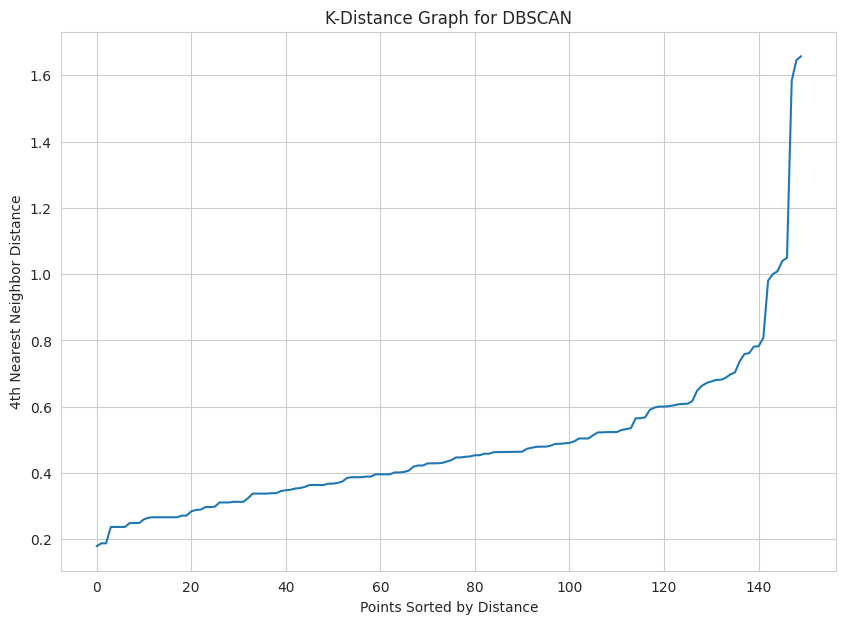

In [12]:
# Find optimal eps using k-distance graph
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, 3], axis=0)
plt.plot(distances)
plt.xlabel('Points Sorted by Distance')
plt.ylabel('4th Nearest Neighbor Distance')
plt.title('K-Distance Graph for DBSCAN')
plt.show()

DBSCAN found 2 clusters and 4 noise points.


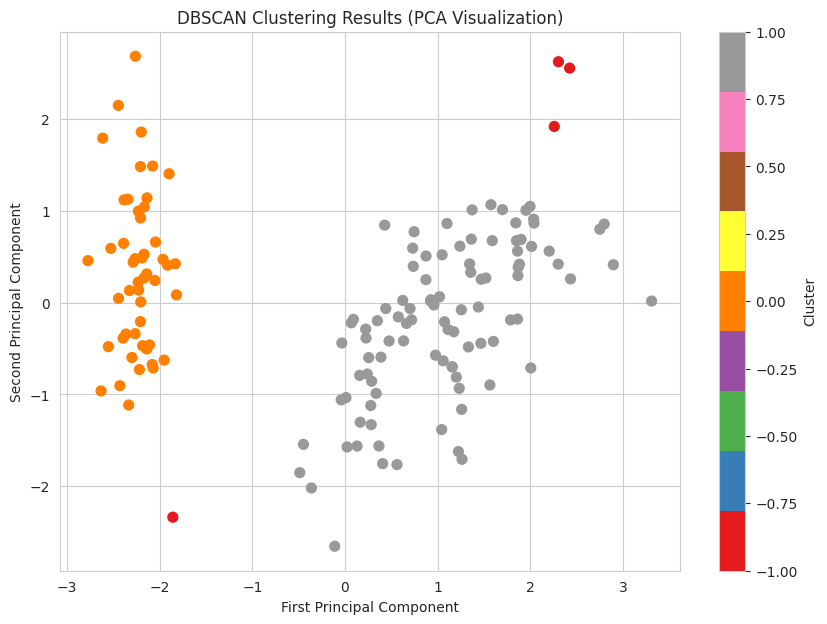

In [13]:
# Apply DBSCAN with selected parameters
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Count clusters and noise points
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"DBSCAN found {n_clusters} clusters and {n_noise} noise points.")

# Visualize DBSCAN clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='Set1', s=50)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('DBSCAN Clustering Results (PCA Visualization)')
plt.colorbar(label='Cluster')
plt.show()

4. Evaluation

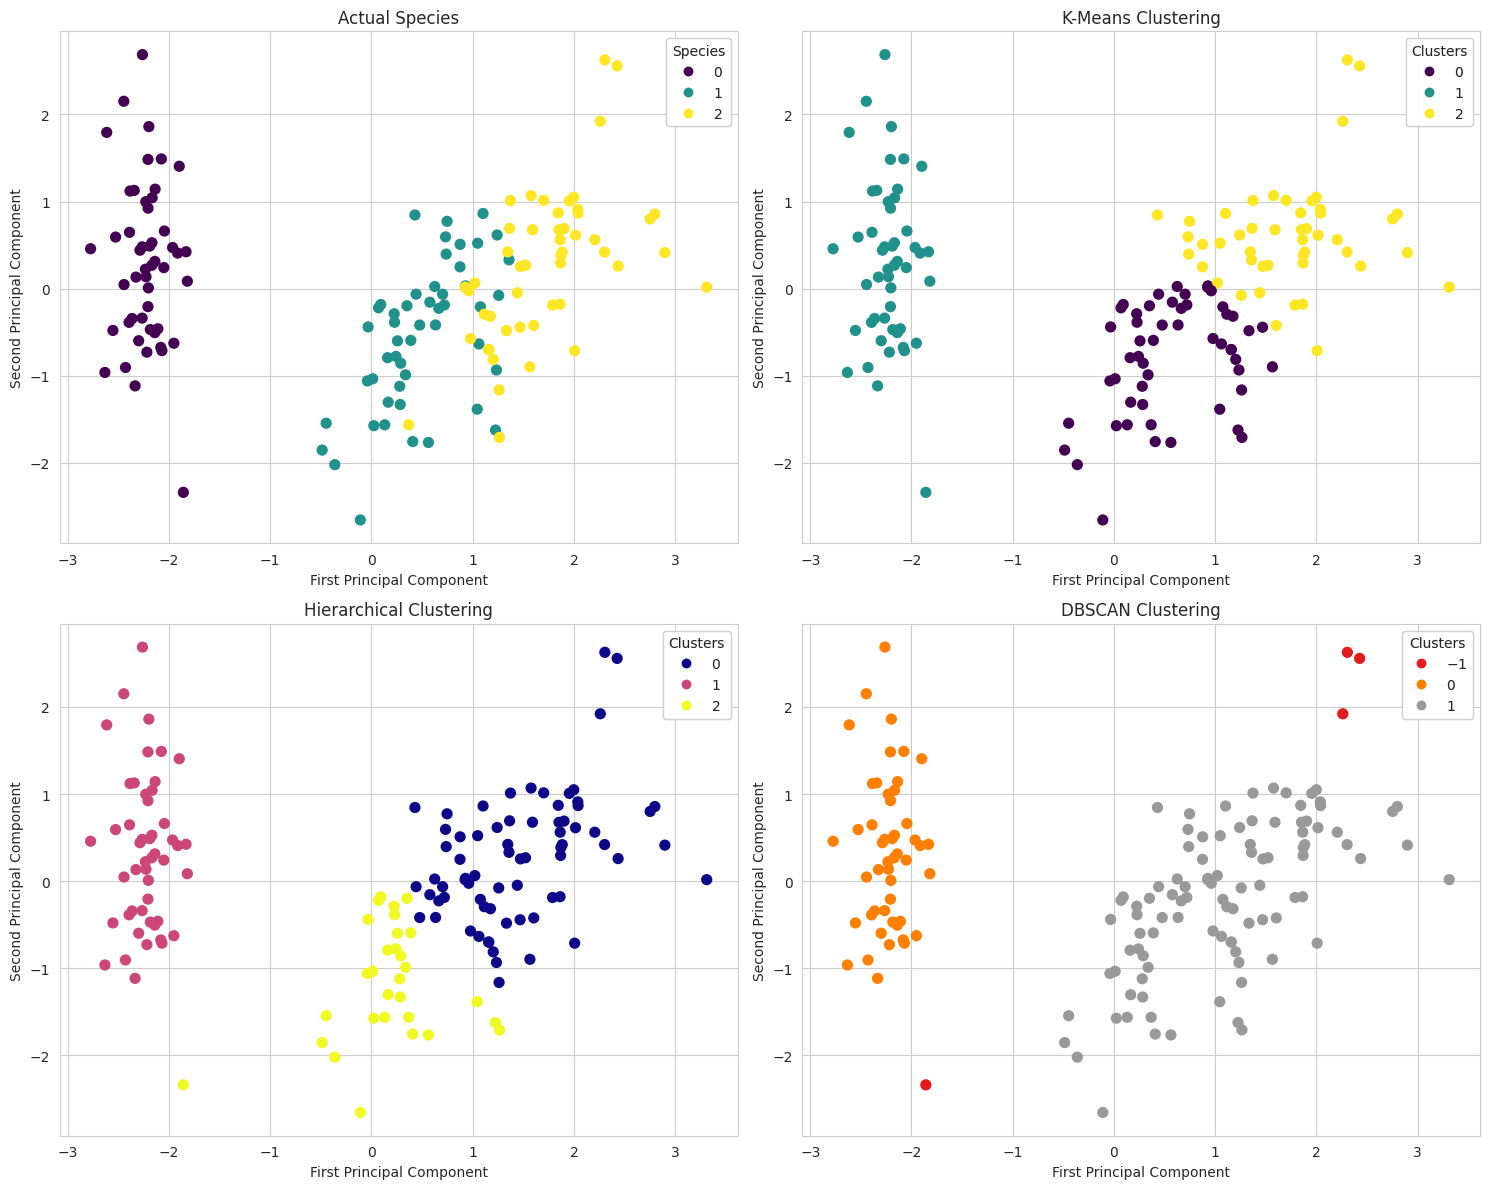

In [14]:
# Compare cluster labels with actual species
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Actual species
scatter = axes[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50)
axes[0, 0].set_title('Actual Species')
axes[0, 0].set_xlabel('First Principal Component')
axes[0, 0].set_ylabel('Second Principal Component')
legend1 = axes[0, 0].legend(*scatter.legend_elements(), title="Species")
axes[0, 0].add_artist(legend1)

# K-Means
scatter = axes[0, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
axes[0, 1].set_title('K-Means Clustering')
axes[0, 1].set_xlabel('First Principal Component')
axes[0, 1].set_ylabel('Second Principal Component')
legend2 = axes[0, 1].legend(*scatter.legend_elements(), title="Clusters")
axes[0, 1].add_artist(legend2)

# Hierarchical
scatter = axes[1, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='plasma', s=50)
axes[1, 0].set_title('Hierarchical Clustering')
axes[1, 0].set_xlabel('First Principal Component')
axes[1, 0].set_ylabel('Second Principal Component')
legend3 = axes[1, 0].legend(*scatter.legend_elements(), title="Clusters")
axes[1, 0].add_artist(legend3)

# DBSCAN
scatter = axes[1, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='Set1', s=50)
axes[1, 1].set_title('DBSCAN Clustering')
axes[1, 1].set_xlabel('First Principal Component')
axes[1, 1].set_ylabel('Second Principal Component')
legend4 = axes[1, 1].legend(*scatter.legend_elements(), title="Clusters")
axes[1, 1].add_artist(legend4)

plt.tight_layout()
plt.show()

In [15]:
# Calculate Adjusted Rand Index for each method
ari_kmeans = adjusted_rand_score(y, kmeans_labels)
ari_hierarchical = adjusted_rand_score(y, hierarchical_labels)
ari_dbscan = adjusted_rand_score(y, dbscan_labels)

print(f"Adjusted Rand Index Scores:")
print(f"K-Means: {ari_kmeans:.4f}")
print(f"Hierarchical: {ari_hierarchical:.4f}")
print(f"DBSCAN: {ari_dbscan:.4f}")

Adjusted Rand Index Scores:
K-Means: 0.6201
Hierarchical: 0.6153
DBSCAN: 0.5518


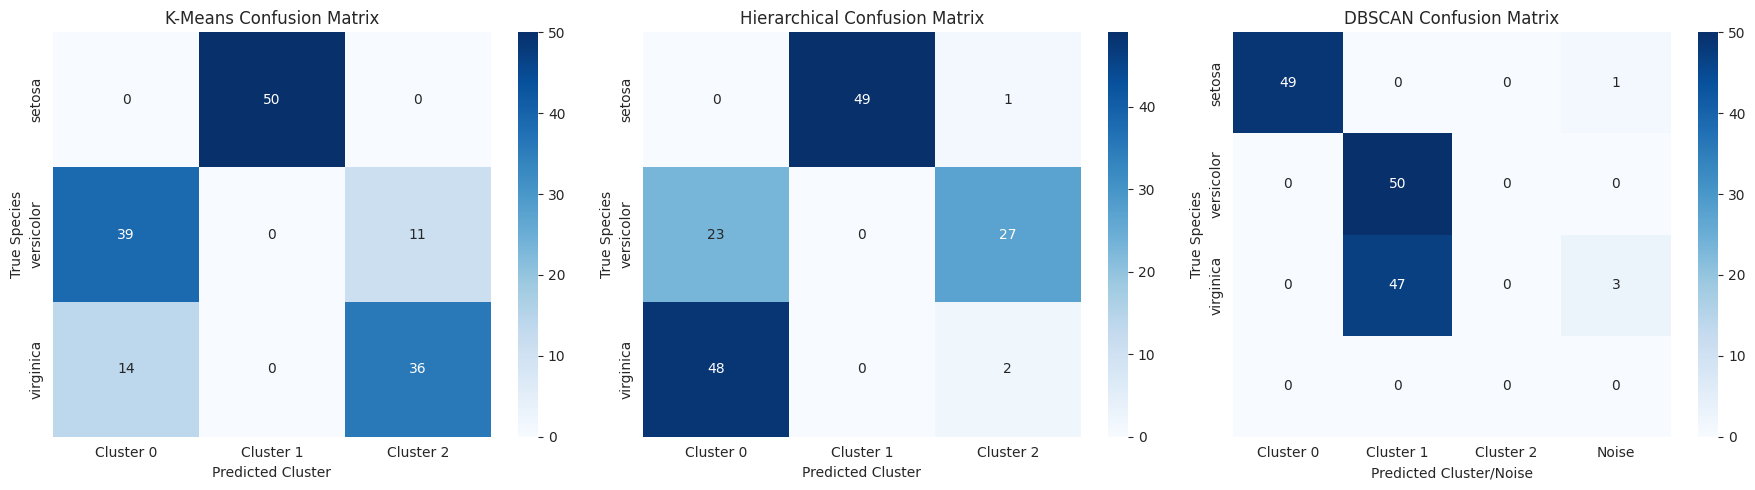

In [16]:
# Confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# K-Means
cm_kmeans = confusion_matrix(y, kmeans_labels)
sns.heatmap(cm_kmeans, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=[f"Cluster {i}" for i in range(3)],
            yticklabels=target_names)
axes[0].set_title('K-Means Confusion Matrix')
axes[0].set_xlabel('Predicted Cluster')
axes[0].set_ylabel('True Species')

# Hierarchical
cm_hierarchical = confusion_matrix(y, hierarchical_labels)
sns.heatmap(cm_hierarchical, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=[f"Cluster {i}" for i in range(3)],
            yticklabels=target_names)
axes[1].set_title('Hierarchical Confusion Matrix')
axes[1].set_xlabel('Predicted Cluster')
axes[1].set_ylabel('True Species')

# DBSCAN
# For DBSCAN, we need to handle noise points (-1 label)
dbscan_for_cm = dbscan_labels.copy()
dbscan_for_cm[dbscan_for_cm == -1] = 3  # Move noise to a separate "cluster"
cm_dbscan = confusion_matrix(y, dbscan_for_cm)
sns.heatmap(cm_dbscan, annot=True, fmt='d', cmap='Blues', ax=axes[2],
            xticklabels=[f"Cluster {i}" for i in range(3)] + ["Noise"],
            yticklabels=target_names)
axes[2].set_title('DBSCAN Confusion Matrix')
axes[2].set_xlabel('Predicted Cluster/Noise')
axes[2].set_ylabel('True Species')

plt.tight_layout()
plt.show()

Summary and Conclusions


In [17]:
# Create a summary table
summary_data = {
    'Algorithm': ['K-Means', 'Hierarchical', 'DBSCAN'],
    'Number of Clusters': [3, 3, n_clusters],
    'Noise Points': [0, 0, n_noise],
    'Adjusted Rand Score': [ari_kmeans, ari_hierarchical, ari_dbscan]
}

summary_df = pd.DataFrame(summary_data)
print("Clustering Performance Summary:")
print(summary_df)

Clustering Performance Summary:
      Algorithm  Number of Clusters  Noise Points  Adjusted Rand Score
0       K-Means                   3             0             0.620135
1  Hierarchical                   3             0             0.615323
2        DBSCAN                   2             4             0.551755
